## 量子半减器

In [10]:
from qiskit import BasicAer,execute
from time import time
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from pprint import pprint
import pixiedust

#### a-b 将结果存到a,对b进行了销毁

In [11]:
reduction_qbit=1
minuend_qbit=1
assist_qbit=2
all_qbit=reduction_qbit+minuend_qbit+assist_qbit
q_reduction = QuantumRegister(reduction_qbit, 'rc')
q_minuend=QuantumRegister(minuend_qbit,'md')
q_ass=QuantumRegister(assist_qbit,'ass')
circuit = QuantumCircuit()
cr = ClassicalRegister(all_qbit, 'cr')

circuit.add_register(q_minuend)
circuit.add_register(q_reduction)
circuit.add_register(q_ass)
all_component_lst=[q_minuend,q_reduction,q_ass]
qbit_lst=[]
for _ in all_component_lst:
    for i in range(_.size):
        qbit_lst.append(_[i])
pprint(qbit_lst)

[(QuantumRegister(1, 'md'), 0),
 (QuantumRegister(1, 'rc'), 0),
 (QuantumRegister(2, 'ass'), 0),
 (QuantumRegister(2, 'ass'), 1)]


In [12]:
# ### 设置值
# circuit.x(qbit_lst[0])
circuit.x(qbit_lst[1])


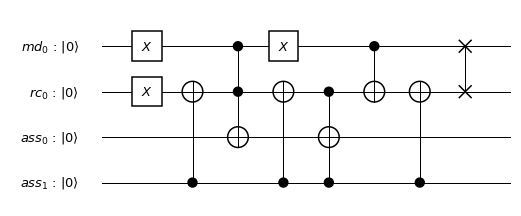

In [13]:
circuit.cx(qbit_lst[3],qbit_lst[1])
circuit.x(qbit_lst[0])
circuit.ccx(qbit_lst[0],qbit_lst[1],qbit_lst[2])
circuit.cx(qbit_lst[3],qbit_lst[1])
circuit.ccx(qbit_lst[3],qbit_lst[1],qbit_lst[2])
# circuit.barrier()
circuit.x(qbit_lst[0])
circuit.cx(qbit_lst[0],qbit_lst[1])
circuit.cx(qbit_lst[3],qbit_lst[1])
circuit.swap(qbit_lst[0],qbit_lst[1])
circuit.draw(output='mpl')

#### a-b,不销毁b,结果存到a

In [14]:
reduction_qbit=1
minuend_qbit=1
assist_qbit=2
all_qbit=reduction_qbit+minuend_qbit+assist_qbit
q_reduction = QuantumRegister(reduction_qbit, 'rc')
q_minuend=QuantumRegister(minuend_qbit,'md')
q_ass=QuantumRegister(assist_qbit,'ass')
circuit = QuantumCircuit()
cr = ClassicalRegister(all_qbit, 'cr')

circuit.add_register(q_minuend)
circuit.add_register(q_reduction)
circuit.add_register(q_ass)
all_component_lst=[q_minuend,q_reduction,q_ass]
qbit_lst=[]
for _ in all_component_lst:
    for i in range(_.size):
        qbit_lst.append(_[i])
pprint(qbit_lst)

[(QuantumRegister(1, 'md'), 0),
 (QuantumRegister(1, 'rc'), 0),
 (QuantumRegister(2, 'ass'), 0),
 (QuantumRegister(2, 'ass'), 1)]


In [15]:
##设置相减的值
# circuit.x(qbit_lst[0])
# circuit.x(qbit_lst[1])

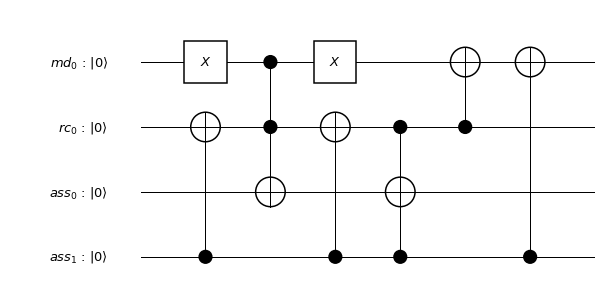

In [16]:
circuit.cx(qbit_lst[3],qbit_lst[1])
circuit.x(qbit_lst[0])
circuit.ccx(qbit_lst[0],qbit_lst[1],qbit_lst[2])
circuit.cx(qbit_lst[3],qbit_lst[1])
circuit.ccx(qbit_lst[3],qbit_lst[1],qbit_lst[2])
circuit.x(qbit_lst[0])

circuit.cx(qbit_lst[1],qbit_lst[0])
circuit.cx(qbit_lst[3],qbit_lst[0])
circuit.draw(output='mpl',scale=1)

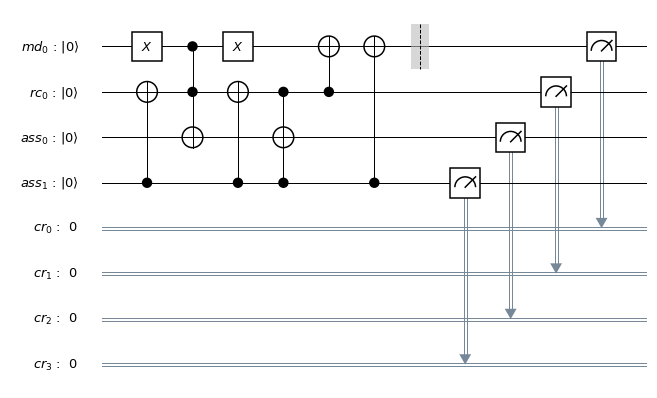

In [17]:
circuit.barrier()
circuit.add_register(cr)
for _ in range(all_qbit):
    circuit.measure(qbit_lst[_],cr[_])
circuit.draw(output='mpl')

In [18]:
backend=BasicAer.get_backend('qasm_simulator')
result=execute(circuit,backend,shots=1).result()
counts=result.get_counts(circuit)
all_lst=list(counts.keys())
all_lst

['0000']